In [1]:
%pylab notebook
import pandas as pd
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [2]:
targetdf=pd.read_csv("../input/train_targets_scored.csv",index_col=0)

In [3]:
targetdf.shape

(23814, 206)

In [4]:
targetdf.sum().describe()

count    206.000000
mean      81.766990
std      115.160351
min        1.000000
25%       19.000000
50%       38.500000
75%       83.000000
max      832.000000
dtype: float64

In [5]:
targetdf.sum().sort_values().tail()

serotonin_receptor_antagonist    404
dopamine_receptor_antagonist     424
cyclooxygenase_inhibitor         435
proteasome_inhibitor             726
nfkb_inhibitor                   832
dtype: int64

In [16]:
targetdf.sum(1).describe()

count    23814.000000
mean         0.707315
std          0.679532
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          7.000000
dtype: float64

In [17]:
targetdf.sum(1).value_counts()

1    12532
0     9367
2     1538
3      303
4       55
5       13
7        6
dtype: int64

In [18]:
a=targetdf[targetdf.sum(1)==2]

In [22]:
a.apply(lambda u: "".join([str(i) for i in u.values]),axis=1).value_counts().head()

00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000001000000000000000000000000000000000000000000    718
00000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000     71
00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000010000000000000000000000000000000000000000000000000000     36
00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000001000000000000000000000000000000000000000000000000     31
000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000

In [47]:
import itertools
def f(s):
    x=s.values
    x=np.where(x>0)[0]
    x=s.index.[x]
    return list(itertools.combinations(x, 2))

In [48]:
l=[]
for i in targetdf.index:
    x=targetdf.loc[i]
    l+=f(x)


len(l)

3033

In [49]:
pd.Series(l).value_counts()

(nfkb_inhibitor, proteasome_inhibitor)                                      718
(kit_inhibitor, pdgfr_inhibitor)                                            261
(flt3_inhibitor, kit_inhibitor)                                             210
(flt3_inhibitor, pdgfr_inhibitor)                                           204
(dopamine_receptor_antagonist, serotonin_receptor_antagonist)                71
                                                                           ... 
(anti-inflammatory, glucocorticoid_receptor_agonist)                          6
(bacterial_50s_ribosomal_subunit_inhibitor, protein_synthesis_inhibitor)      1
(protein_tyrosine_kinase_inhibitor, tyrosine_kinase_inhibitor)                1
(fgfr_inhibitor, raf_inhibitor)                                               1
(egfr_inhibitor, erbb2_inhibitor)                                             1
Length: 186, dtype: int64

In [52]:
import itertools
def f(s):
    x=s.values
    x=np.where(x>0)[0]
    x=s.index[x]
    return list(itertools.combinations(x, 3))
l=[]
for i in targetdf.index:
    x=targetdf.loc[i]
    l+=f(x)


pd.Series(l).value_counts()

(flt3_inhibitor, kit_inhibitor, pdgfr_inhibitor)                            204
(kit_inhibitor, pdgfr_inhibitor, vegfr_inhibitor)                            44
(bcr-abl_inhibitor, kit_inhibitor, pdgfr_inhibitor)                          13
(apoptosis_stimulant, caspase_activator, topoisomerase_inhibitor)            12
(flt3_inhibitor, pdgfr_inhibitor, vegfr_inhibitor)                           12
                                                                           ... 
(apoptosis_stimulant, nitric_oxide_production_inhibitor, nrf2_activator)      6
(apoptosis_stimulant, bcl_inhibitor, nrf2_activator)                          6
(fgfr_inhibitor, raf_inhibitor, vegfr_inhibitor)                              1
(fgfr_inhibitor, pdgfr_inhibitor, raf_inhibitor)                              1
(fgfr_inhibitor, kit_inhibitor, raf_inhibitor)                                1
Length: 96, dtype: int64

In [6]:
traindf = pd.read_csv("../input/train_features.csv",index_col=0)

In [7]:
traindf['cp_type'].value_counts()

trt_cp         21948
ctl_vehicle     1866
Name: cp_type, dtype: int64

In [8]:
traindf['cp_time'].value_counts()

48    8250
72    7792
24    7772
Name: cp_time, dtype: int64

In [9]:
traindf

cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
sig_id                                                                       
id_000644bb2       trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
id_000779bfc       trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
id_000a6266a       trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
id_0015fd391       trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
id_001626bd3       trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   
...                   ...      ...     ...     ...     ...     ...     ...   
id_fffb1ceed       trt_cp       24      D2  0.1394 -0.0636 -0.1112 -0.5080   
id_fffb70c0c       trt_cp       24      D2 -1.3260  0.3478 -0.3743  0.9905   
id_fffc1c3f4  ctl_vehicle       48      D2  0.3942  0.3756  0.3109 -0.7389   
id_fffcb9e7c       trt_cp       24      D1  0.6660  0.2324  0.4392  0.2044   
id_ffffdd77b       trt_cp       72      D1 -0.8598  1.0240 -0.1361  0.7952   

                 g-4     g-5     g-6  ...    c-90    c-91    c-92    c-93  \
sig_id                                ...                                   
id_000644bb2 -0.1944 -1.0120 -1.0220  ...  0.2862  0.2584  0.8076  0.5523   
id_000779bfc  1.0190  0.5207  0.2341  ... -0.4265  0.7543  0.4708  0.0230   
id_000a6266a -0.0323  1.2390  0.1715  ... -0.7250 -0.6297  0.6103  0.0223   
id_0015fd391  4.0620 -0.8095 -1.9590  ... -2.0990 -0.6441 -5.6300 -1.3780   
id_001626bd3  1.4180 -0.8244 -0.2800  ...  0.0042  0.0048  0.6670  1.0690   
...              ...     ...     ...  ...     ...     ...     ...     ...   
id_fffb1ceed -0.4713  0.7201  0.5773  ...  0.1969  0.0262 -0.8121  0.3434   
id_fffb70c0c -0.7178  0.6621 -0.2252  ...  0.4286  0.4426  0.0423 -0.3195   
id_fffc1c3f4  0.5505 -0.0159 -0.2541  ...  0.5409  0.3755  0.7343  0.2807   
id_fffcb9e7c  0.8531 -0.0343  0.0323  ... -0.1105  0.4258 -0.2012  0.1506   
id_ffffdd77b -0.3611 -3.6750 -1.2420  ... -3.3890 -1.7450 -6.6300 -4.0950   

                c-94    c-95    c-96    c-97    c-98    c-99  
sig_id                                                        
id_000644bb2 -0.1912  0.6584 -0.3981  0.2139  0.3801  0.4176  
id_000779bfc  0.2957  0.4899  0.1522  0.1241  0.6077  0.7371  
id_000a6266a -1.3240 -0.3174 -0.6417 -0.2187 -1.4080  0.6931  
id_0015fd391 -0.8632 -1.2880 -1.6210 -0.8784 -0.3876 -0.8154  
id_001626bd3  0.5523 -0.3031  0.1094  0.2885 -0.3786  0.7125  
...              ...     ...     ...     ...     ...     ...  
id_fffb1ceed  0.5372 -0.3246  0.0631  0.9171  0.5258  0.4680  
id_fffb70c0c -0.8086 -0.9798 -0.2084 -0.1224 -0.2715  0.3689  
id_fffc1c3f4  0.4116  0.6422  0.2256  0.7592  0.6656  0.3808  
id_fffcb9e7c  1.5230  0.7101  0.1732  0.7015 -0.6290  0.0740  
id_ffffdd77b -7.3860 -1.4160 -3.5770 -0.4775 -2.1500 -4.2520  

[23814 rows x 875 columns]

In [10]:
g_cols=[u for u in traindf.columns if u.startswith('g-')]
c_cols=[u for u in traindf.columns if u.startswith('c-')]

In [48]:
len(g_cols),len(c_cols)

(772, 100)

In [57]:
(targetdf.sum(1)==0).mean()

0.3933400520702108

In [87]:
targetdf.mean().sort_values().tail(20)

glucocorticoid_receptor_agonist      0.011170
sodium_channel_inhibitor             0.011212
adrenergic_receptor_agonist          0.011338
kit_inhibitor                        0.011464
flt3_inhibitor                       0.011716
calcium_channel_blocker              0.011800
hmgcr_inhibitor                      0.011884
pdgfr_inhibitor                      0.012472
acetylcholine_receptor_antagonist    0.012640
tubulin_inhibitor                    0.013270
egfr_inhibitor                       0.014109
cdk_inhibitor                        0.014277
adrenergic_receptor_antagonist       0.015117
glutamate_receptor_antagonist        0.015411
dna_inhibitor                        0.016881
serotonin_receptor_antagonist        0.016965
dopamine_receptor_antagonist         0.017805
cyclooxygenase_inhibitor             0.018267
proteasome_inhibitor                 0.030486
nfkb_inhibitor                       0.034937
dtype: float64

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
X=traindf[g_cols+c_cols].values.copy()
X[np.abs(X)<3]=0
y=targetdf['adrenergic_receptor_antagonist'].values
#y=targetdf.sum(1)==1
clf = LogisticRegression(random_state=0,max_iter=500).fit(X, y)


In [105]:
traindf.shape[1]**2

765625

In [113]:
np.min(u)

-153.89012408723133

In [139]:
def f(p,y):
    return -(1-y)*np.log(1-p)-y*np.log(p)
def df(p,y):
    return -(1-y)/(1-p)-y/(p)

In [150]:
df(0.5,1),df(0.001,0),df(0.00001,0),df(0.0000001,1)

(-2.0, -1.001001001001001, -1.000010000100001, -10000000.0)

In [170]:
x=df(p[:,1],y)
x=np.log(-x)
#x[x<0.1]=np.nan

In [196]:
u=targetdf.loc['id_099a7a509']
u[u>0]

nfkb_inhibitor          1
proteasome_inhibitor    1
Name: id_099a7a509, dtype: int64

In [197]:
targetdf[targetdf['adrenergic_receptor_antagonist']>0]

5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
sig_id                                                              
id_00be9e759                            0                       0   
id_013d94d49                            0                       0   
id_01b44b61f                            0                       0   
id_02a8ee101                            0                       0   
id_02f9e8511                            0                       0   
...                                   ...                     ...   
id_fc01bc1ec                            0                       0   
id_fd7253676                            0                       0   
id_fe931b05c                            0                       0   
id_fe95eabe1                            0                       0   
id_ff2c171d2                            0                       0   

              acat_inhibitor  acetylcholine_receptor_agonist  \
sig_id                                                         
id_00be9e759               0                               0   
id_013d94d49               0                               0   
id_01b44b61f               0                               0   
id_02a8ee101               0                               0   
id_02f9e8511               0                               0   
...                      ...                             ...   
id_fc01bc1ec               0                               0   
id_fd7253676               0                               0   
id_fe931b05c               0                               0   
id_fe95eabe1               0                               0   
id_ff2c171d2               0                               0   

              acetylcholine_receptor_antagonist  \
sig_id                                            
id_00be9e759                                  0   
id_013d94d49                                  0   
id_01b44b61f                                  0   
id_02a8ee101                                  0   
id_02f9e8511                                  0   
...                                         ...   
id_fc01bc1ec                                  0   
id_fd7253676                                  0   
id_fe931b05c                                  0   
id_fe95eabe1                                  0   
id_ff2c171d2                                  0   

              acetylcholinesterase_inhibitor  adenosine_receptor_agonist  \
sig_id                                                                     
id_00be9e759                               0                           0   
id_013d94d49                               0                           0   
id_01b44b61f                               0                           0   
id_02a8ee101                               0                           0   
id_02f9e8511                               0                           0   
...                                      ...                         ...   
id_fc01bc1ec                               0                           0   
id_fd7253676                               0                           0   
id_fe931b05c                               0                           0   
id_fe95eabe1                               0                           0   
id_ff2c171d2                               0                           0   

              adenosine_receptor_antagonist  adenylyl_cyclase_activator  \
sig_id                                                                    
id_00be9e759                              0                           0   
id_013d94d49                              0                           0   
id_01b44b61f                              0                           0   
id_02a8ee101                              0                           0   
id_02f9e8511                              0                           0   
...                                     ...                         ...   
id_fc01bc1ec                  

In [210]:
u=traindf.loc[targetdf[targetdf['adrenergic_receptor_antagonist']>0].index][g_cols+c_cols].abs()
u.max(1)

sig_id
id_00be9e759    5.370
id_013d94d49    4.591
id_01b44b61f    4.923
id_02a8ee101    2.700
id_02f9e8511    5.130
                ...  
id_fc01bc1ec    5.852
id_fd7253676    4.850
id_fe931b05c    5.241
id_fe95eabe1    3.545
id_ff2c171d2    5.760
Length: 360, dtype: float64

<IPython.core.display.Javascript object>


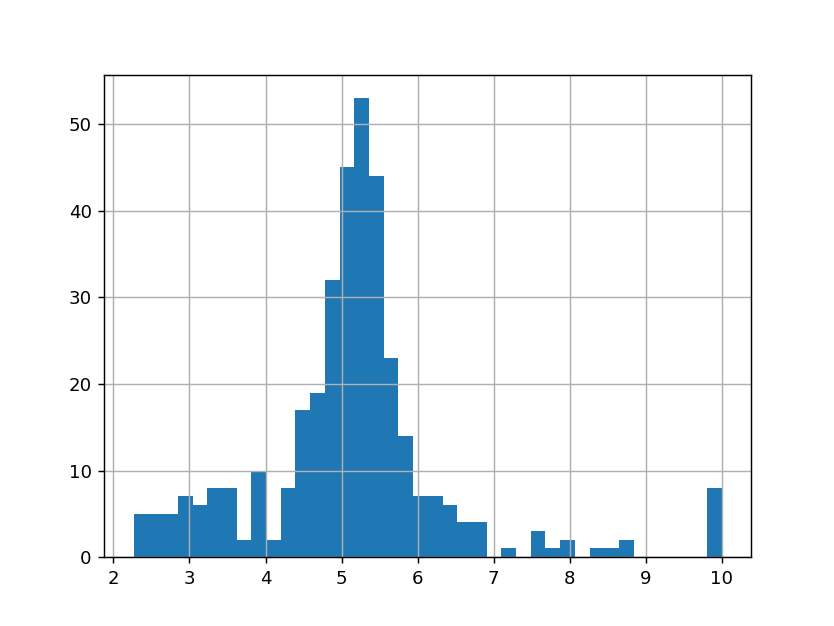

In [213]:
figure()
u.max(1).hist(bins=40);

In [207]:
x=trai

707    15
130    14
466     8
12      8
676     7
       ..
451     1
449     1
447     1
445     1
2       1
Length: 265, dtype: int64

In [195]:
traindf[traindf['g-1']>5]

cp_type  cp_time cp_dose     g-0    g-1     g-2    g-3  \
sig_id                                                                     
id_099a7a509       trt_cp       48      D2  5.4050  5.033 -0.5520 -2.086   
id_fe3ba63c2  ctl_vehicle       24      D2  0.1788  5.039 -0.1357 -1.398   

                 g-4     g-5     g-6  ...     c-90     c-91    c-92     c-93  \
sig_id                                ...                                      
id_099a7a509  6.1910 -3.6610  1.5070  ... -10.0000 -10.0000 -8.3620 -10.0000   
id_fe3ba63c2  0.8808 -0.4956 -0.0237  ...   0.6545   0.2029  0.8426  -0.5089   

                 c-94    c-95     c-96    c-97     c-98    c-99  
sig_id                                                           
id_099a7a509 -10.0000 -6.4940 -10.0000 -8.6030 -10.0000 -7.5870  
id_fe3ba63c2  -0.3962  0.0833  -0.8328  0.5907   0.7548 -0.8095  

[2 rows x 875 columns]

In [138]:
f(0.5,1)-f(0.501,1)

0.0019980026626730263

In [137]:
f(0.001,0)-f(0.002,0)

-0.001001502337089545

In [130]:
u=-np.log(1/p[:,1]-1)
v=-(2*y-1)*np.log(1e-15)

In [225]:
print(clf.score(X, y),y.mean(),y.sum(),(1-clf.score(X, y))*len(y))
p=clf.predict_proba(X)
log_loss(y,p[:,1]),log_loss(y,y*0+y.mean())

0.9856806920298984 0.015117157974300832 360 340.99999999999983


(0.058644048927397205, 0.07837230435323761)

In [221]:
print(clf.score(X, y),y.mean(),y.sum(),(1-clf.score(X, y))*len(y))
p=clf.predict_proba(X)
log_loss(y,p[:,1]),log_loss(y,y*0+y.mean())

0.9857226841353826 0.015117157974300832 360 339.99999999999983


(0.0529786440740369, 0.07837230435323761)

In [220]:
pd.Series(list(zip(y,1*(p[:,1]>0.5)))).value_counts()

(0, 0)    23451
(1, 0)      337
(1, 1)       23
(0, 1)        3
dtype: int64

In [89]:
print(clf.score(X, y),y.mean(),y.sum())
p=clf.predict_proba(X)
log_loss(y,p[:,1]),log_loss(y,y*0+y.mean())

1.0 0.011715797430083144 279


(0.00158310456153822, 0.06374490669909394)

In [84]:
print(clf.score(X, y),y.mean(),y.sum())
p=clf.predict_proba(X)
log_loss(y,p[:,1]),log_loss(y,y*0+y.mean())

0.984336944654405 0.016964810615604266 404


(0.055591522795583576, 0.08597907269352847)

In [82]:
print(clf.score(X, y),y.mean(),y.sum())
p=clf.predict_proba(X)
log_loss(y,p[:,1]),log_loss(y,y*0+y.mean())

0.9834971025447216 0.017804652725287647 424


(0.05751511160802249, 0.08936760259594333)

In [80]:
print(clf.score(X, y),y.mean(),y.sum())
p=clf.predict_proba(X)
log_loss(y,p[:,1]),log_loss(y,y*0+y.mean())

0.983119173595364 0.018266565885613505 435


(0.060296913994378136, 0.09121397771012406)

In [78]:
print(clf.score(X, y),y.mean(),y.sum())
p=clf.predict_proba(X)
log_loss(y,p[:,1]),log_loss(y,y*0+y.mean())

1.0 0.030486268581506677 726


(8.150232534712622e-06, 0.13642844402313006)

In [74]:

clf.score(X, y),y.mean(),y.sum()

(0.9989082052574116, 0.03493743176282859, 832)

In [76]:
p=clf.predict_proba(X)
log_loss(y,p[:,1]),log_loss(y,y*0+y.mean())

(0.004231325144124743, 0.15150689597052044)

In [59]:
traindf[c_cols].corr()

c-0       c-1       c-2       c-3       c-4       c-5       c-6  \
c-0   1.000000  0.827336  0.848472  0.798830  0.840695  0.844469  0.811946   
c-1   0.827336  1.000000  0.901416  0.808364  0.879258  0.869569  0.876924   
c-2   0.848472  0.901416  1.000000  0.830759  0.909991  0.882794  0.898819   
c-3   0.798830  0.808364  0.830759  1.000000  0.831523  0.829550  0.805506   
c-4   0.840695  0.879258  0.909991  0.831523  1.000000  0.883526  0.893285   
...        ...       ...       ...       ...       ...       ...       ...   
c-95  0.815499  0.803637  0.837420  0.799760  0.839111  0.834881  0.809419   
c-96  0.845579  0.871383  0.898270  0.822001  0.901603  0.873973  0.900005   
c-97  0.834513  0.866084  0.874869  0.814889  0.873534  0.872085  0.856279   
c-98  0.800682  0.815952  0.839640  0.779998  0.834823  0.820600  0.836485   
c-99  0.777426  0.781510  0.802032  0.768872  0.795218  0.800263  0.790569   

           c-7       c-8       c-9  ...      c-90      c-91      c-92  \
c-0   0.793171  0.842977  0.759971  ...  0.835217  0.832529  0.799196   
c-1   0.793199  0.879892  0.812345  ...  0.875405  0.839236  0.876519   
c-2   0.812980  0.896087  0.821522  ...  0.902964  0.872660  0.883866   
c-3   0.752940  0.830369  0.765626  ...  0.825342  0.813555  0.812200   
c-4   0.808096  0.888384  0.822614  ...  0.895967  0.890255  0.882185   
...        ...       ...       ...  ...       ...       ...       ...   
c-95  0.775249  0.829459  0.763117  ...  0.818838  0.803295  0.793390   
c-96  0.824395  0.879109  0.819864  ...  0.888795  0.876358  0.867251   
c-97  0.793950  0.871410  0.805856  ...  0.860923  0.849142  0.836722   
c-98  0.772028  0.842810  0.811111  ...  0.816530  0.818789  0.802289   
c-99  0.784123  0.803613  0.744685  ...  0.794279  0.784466  0.767997   

          c-93      c-94      c-95      c-96      c-97      c-98      c-99  
c-0   0.817657  0.846457  0.815499  0.845579  0.834513  0.800682  0.777426  
c-1   0.868431  0.886750  0.803637  0.871383  0.866084  0.815952  0.781510  
c-2   0.885419  0.906584  0.837420  0.898270  0.874869  0.839640  0.802032  
c-3   0.803603  0.830301  0.799760  0.822001  0.814889  0.779998  0.768872  
c-4   0.868684  0.900309  0.839111  0.901603  0.873534  0.834823  0.795218  
...        ...       ...       ...       ...       ...       ...       ...  
c-95  0.787176  0.819529  1.000000  0.821950  0.811155  0.787529  0.758110  
c-96  0.873935  0.894631  0.821950  1.000000  0.863061  0.819600  0.789649  
c-97  0.840606  0.862876  0.811155  0.863061  1.000000  0.801809  0.775300  
c-98  0.811567  0.824202  0.787529  0.819600  0.801809  1.000000  0.755991  
c-99  0.799651  0.827228  0.758110  0.789649  0.775300  0.755991  1.000000  

[100 rows x 100 columns]

<IPython.core.display.Javascript object>


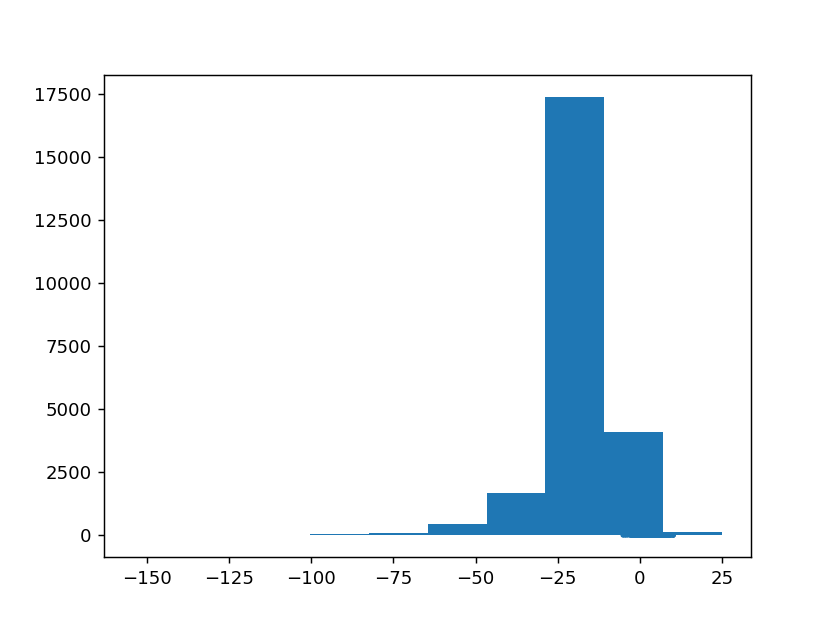

In [55]:
figure()
plt.scatter(traindf['g-0'],traindf['g-79'],s=1)

In [11]:
from MulticoreTSNE import MulticoreTSNE as TSNE
tsne = TSNE(n_jobs=6)
X=traindf[g_cols].values
Y = tsne.fit_transform(X)

In [12]:
(targetdf.index==traindf.index).all()

True

In [13]:
targetdf.sum().sort_values().tail()

serotonin_receptor_antagonist    404
dopamine_receptor_antagonist     424
cyclooxygenase_inhibitor         435
proteasome_inhibitor             726
nfkb_inhibitor                   832
dtype: int64

In [22]:
from sklearn.metrics import log_loss

In [24]:
targetdf.mean()

5-alpha_reductase_inhibitor              0.000714
11-beta-hsd1_inhibitor                   0.000756
acat_inhibitor                           0.001008
acetylcholine_receptor_agonist           0.007979
acetylcholine_receptor_antagonist        0.012640
                                           ...   
ubiquitin_specific_protease_inhibitor    0.000252
vegfr_inhibitor                          0.007139
vitamin_b                                0.001092
vitamin_d_receptor_agonist               0.001638
wnt_inhibitor                            0.001260
Length: 206, dtype: float64

In [26]:
preddf=targetdf*0
m=targetdf.mean().to_dict()
for u in preddf.columns:
    preddf[u]=m[u]

In [36]:
d={}
for u in preddf.columns:
    d[u]=log_loss(targetdf[u].values,preddf[u].values)

In [40]:
l=pd.Series(d).to_frame().sort_values(0)
l

0
atp-sensitive_potassium_channel_antagonist  0.000465
erbb2_inhibitor                             0.000465
retinoid_receptor_antagonist                0.002340
atm_kinase_inhibitor                        0.002340
laxative                                    0.002340
...                                              ...
serotonin_receptor_antagonist               0.085979
dopamine_receptor_antagonist                0.089368
cyclooxygenase_inhibitor                    0.091214
proteasome_inhibitor                        0.136428
nfkb_inhibitor                              0.151507

[206 rows x 1 columns]

<IPython.core.display.Javascript object>


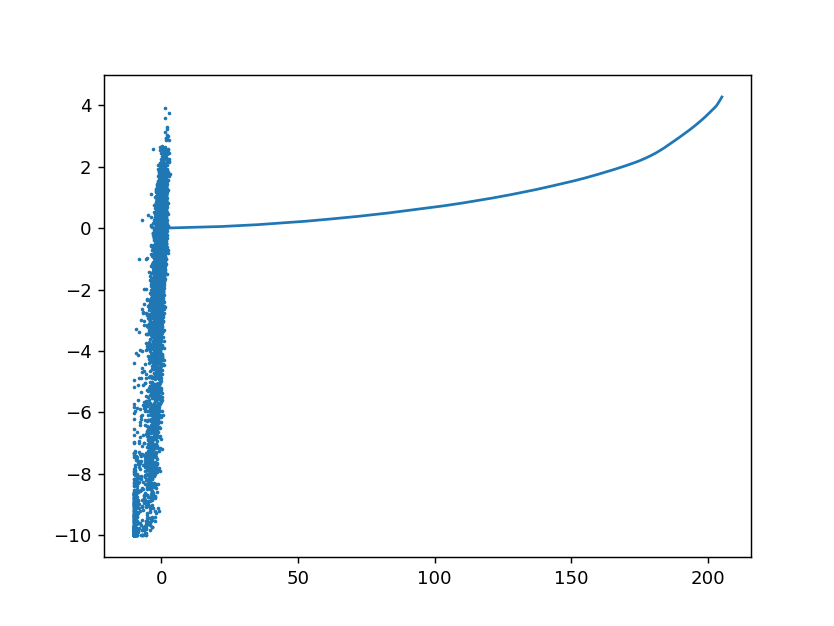

In [47]:
figure()
plt.plot(l.cumsum().values)

<IPython.core.display.Javascript object>


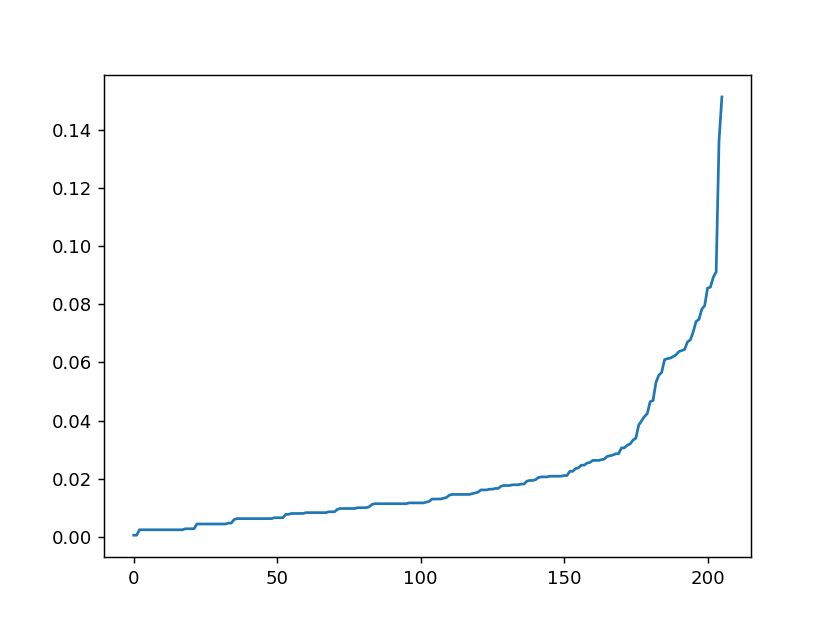

In [46]:
figure()
plt.plot(l.values)

In [41]:
l.mean()

0    0.020739
dtype: float64

In [43]:
0.005*206,0.005/0.023

(1.03, 0.2173913043478261)

<IPython.core.display.Javascript object>


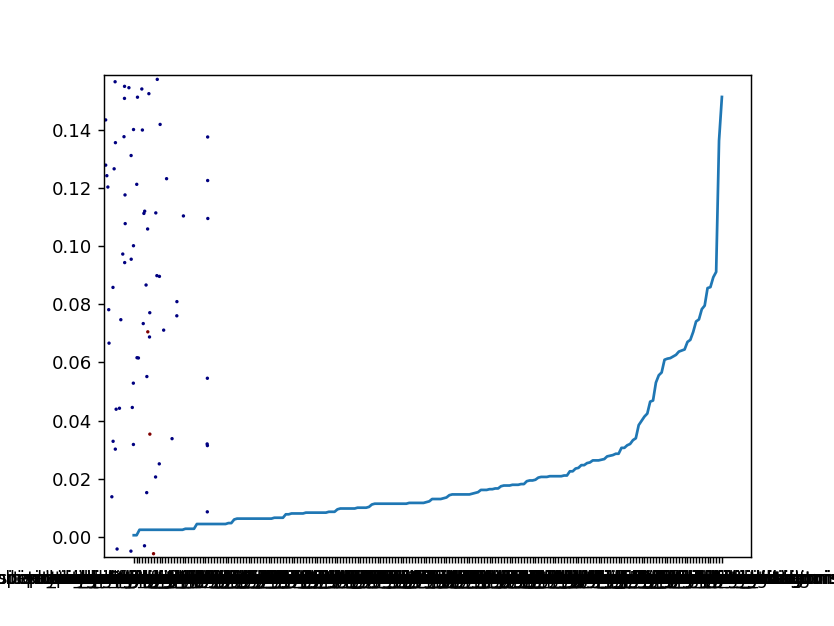

In [21]:
plt.figure()
vis_x = Y[:, 0]
vis_y = Y[:, 1]
c=targetdf['cyclooxygenase_inhibitor'].values
plt.scatter(vis_x, vis_y,s=3, c=c, cmap=plt.cm.get_cmap("jet", 2), marker='.');

<IPython.core.display.Javascript object>


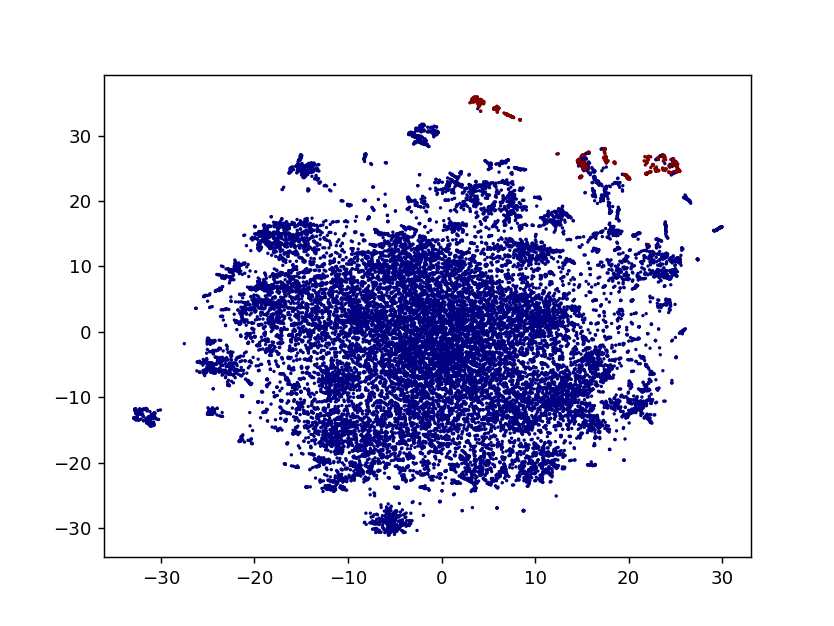

In [20]:
plt.figure()
vis_x = Y[:, 0]
vis_y = Y[:, 1]
c=targetdf['proteasome_inhibitor'].values
plt.scatter(vis_x, vis_y,s=3, c=c, cmap=plt.cm.get_cmap("jet", 2), marker='.')